In [2]:
import sys
# from python_environment_check import check_packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from os.path import expanduser as ospath
import csv
import re
import locale
from datetime import datetime
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
#import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from numpy import loadtxt
from numpy import unique
from IPython.display import display, HTML
display("text/html", "<style>.container { width:550% !important; }</style>")
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from os.path import expanduser as ospath
import csv
import re
import locale
from datetime import datetime
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
#import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from numpy import loadtxt
from numpy import unique
from IPython.display import display, HTML
display("text/html", "<style>.container { width:550% !important; }</style>")
from datetime import datetime

# Define a wheather_structure
class wheather_structure:
    def __init__(self, name, date, wheather_infos):
        self.name = name
        self.date = date
        self.wheather_infos = wheather_infos


# Define a place_structure
class place_structure:
    def __init__(self, place, nearby):
        self.place = place
        self.nearby = nearby


def find_plc(place_sequence, place):
    for s in place_sequence:
        if s.place == place:
            return s
    return None  # Return None if element not found

# Function to add a new element to the wheather_squence
def add_plc(place_sequence, place,  nearby):
    entry = find_plc(place_sequence,place)
    if entry != None:
        #print("Element already exists in the wheather_squence.")
        return entry  # Return None if element exists
    new_element = place_structure(place, nearby)
    place_sequence.append(new_element)
    return new_element  # Return the newly added element


# Function to search for an element in the wheather_squence
# def find_wthr(wheather_squence, name, date_str):
#     # Parse the date string to datetime object
#     date = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
#     # Iterate through the wheather_squence to find the element
#     for s in wheather_squence:
#         if s.name == name and s.date == date:
#             return s
#     return None  # Return None if element not found

# # Function to add a new element to the wheather_squence
# def add_wthr(wheather_squence, name, date_str, wheather_infos):
#     # Check if the element already exists in the wheather_squence
#     if find_wthr(wheather_squence, name, date_str):
#         print("Element already exists in the wheather_squence.")
#         return wheather_squence  # Return the original wheather_squence if element exists
#     # Parse the date string to datetime object
#     date = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
#     # Create a new wheather_structure object and add it to the wheather_squence
#     wheather_squence.append(wheather_structure(name, date, wheather_infos))
#     return wheather_squence  # Return the updated wheather_squence

# Function to search for an element in the wheather_squence
def find_wthr(wheather_sequence, name, date_str):
    for s in wheather_sequence:
        idate = datetime.strptime(date_str,"%Y-%m-%d %H:%M:%S").replace(minute=0, second=0).strftime("%Y-%m-%d %H:%M:%S") 
        if s.name == name and s.date.strftime("%Y-%m-%d %H:%M:%S") == idate:
            #print(' sb::: ',s.name,' ::: ',s.date)
            return s
    return None  # Return None if element not found

# Function to add a new element to the wheather_squence
def add_wthr(wheather_sequence, name, date_str, tomb):
    # Check if the element already exists in the wheather_squence
    entry = find_wthr(wheather_sequence, name, date_str)
    if entry != None:
        #print("Element already exists in the wheather_squence.")
        return entry  # Return None if element exists
    # Parse the date string to datetime object
    date = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
    # Create a new wheather_structure object and add it to the wheather_squence
    new_element = wheather_structure(name, date, tomb)
    wheather_sequence.append(new_element)
    return new_element  # Return the newly added element

import requests
from geopy.geocoders import Nominatim
from math import sin, cos, sqrt, atan2, radians

def get_coordinates(place_name):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(place_name)
    if location:
        return location.latitude, location.longitude
    else:
        return None
    
def calculate_distance(coords1, coords2):
    lat1_rad = radians(coords1[0])
    lon1_rad = radians(coords1[1])
    lat2_rad = radians(coords2[0])
    lon2_rad = radians(coords2[1])
    # Radius of the Earth in kilometers
    R = 6371.0
    # Calculate the differences in coordinates
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    # Calculate the distance using the Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    distance = round(distance, 3)
    return distance    
  

def search_nearby_locations(place_name,target_coords,radius_km,datum):
    latitude = target_coords[0]
    longitude = target_coords[1]    
    url = "https://api.weatherapi.com/v1/search.json"
    params = {
        "q": f"{latitude},{longitude}",
        "key": "977871c4662a4599911142437240105"  # Replace with your WeatherAPI.com API key
     }
    response = requests.get(url, params=params)
    # search_url = f'http://api.weatherapi.com/v1/search.json?key={api_key}&q={target_town}'
    # response = requests.get(search_url)
    data = response.json()
    if "error" in data:
        print(f"Error: {data['error']['message']}")
        return []
    else:
        if data:
            #print("Nearby Locations:")
            found_towns = []
            for location in data:
                #print('loc:',location["name"])
                town_coords = get_coordinates(location["name"])
                distance_km = calculate_distance(target_coords, town_coords)
                if distance_km <= radius_km:
                    found_towns.append(location)
                    print(place_name, ' distance is km ',distance_km, 'from ',location["name"],'on: ',datum)
            add_plc(place_sequence, place_name, found_towns)
        else:
            print("No nearby locations found.")
        return found_towns


def get_wheather_info(place_name,km,start_date,end_date): 
    #place_name = 'Tápiószentmárton'
    #km = 50
    #start_date = '2023-07-02'
    #end_date = '2023-07-02'
    target_coords = get_coordinates(place_name)
    #if target_coords:
    #    print(f"Coordinates of {place_name}: Latitude {target_coords[0]}, Longitude {target_coords[1]}")
    #else:
    #    print(f"Coordinates of {place_name} not found.")    
    found = find_plc(place_sequence, place_name)
    if found == None :
       found_towns = search_nearby_locations(place_name,target_coords,km,start_date)
    else:
       found_towns = found.nearby
    for location in found_towns:
        #print(location["name"])
    
        url = "https://api.weatherapi.com/v1/history.json"
        params = {
            "q": location["name"],
            "key": "977871c4662a4599911142437240105",  # Replace with your WeatherAPI.com API key
            "timesteps":"1d",
            'dt': start_date,
            'end_dt': end_date,
            'hour': '1d',
            'lang': 'en'  # Language for response
        }
        r = requests.get(url, params=params)
        if r.status_code == 200:
          data = r.json()
          # Extract and print hourly temperature data
          # for hour_data in data['forecast']['forecastday'][0]['hour']:
          #     print(hour_data['time'], hour_data['temp_c'],hour_data['wind_kph'],hour_data['wind_degree'],hour_data['wind_dir'],hour_data['will_it_rain'],hour_data['chance_of_rain'],hour_data['humidity'])
          return data
        else:
          print('Failed to retrieve data. Status code:', r.status_code)
          return []

        
def wi(place_name,km,date_str):
    # place_name = 'Csönge'
    # km = 50
    # date_str = "2023-07-02 12:27:58"
#    date_object = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
#    dt_date = date_object.strftime("%Y-%m-%d")
#    dt_date = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S").date_object.strftime("%Y-%m-%d")
#    print(dt_date)
    old = find_wthr(wheather_sequence, place_name, date_str)
    if old == None :
        winfos = get_wheather_info(place_name,km,date_str,date_str) 
        #wheather_squence contains as key: place_names and hourly dates ((because the wheather data is given as hourly data as well))
        r_time = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S").replace(minute=0, second=0).strftime("%Y-%m-%d %H:%M:%S") 
        entry = add_wthr(wheather_sequence, place_name, r_time, winfos)
        print('new place ',place_name,  'location ',entry.name ,'on: ',date_str)
    else:
        entry = old
        #print('orig place ',place_name,  'location ',entry.name ,'on: ',date_str)
        
    #print(f"Name: {new_entry.name}, Date: {new_entry.date}, wheather_infos: {new_entry.wheather_infos}")
    # Print the updated wheather_squence
    #print("Updated wheather_squence:")
    #for s in wheather_squence:
        #print(f"Name: {s.name}, Date: {s.date}, wheather_infos: {s.wheather_infos}")
    #rounded_time = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S").replace(minute=0, second=0).strftime("%Y-%m-%d %H:%M") 
    #for hour_data in entry.wheather_infos['forecast']['forecastday'][0]['hour']:
    #    if hour_data['time'] == rounded_time:
           #print(hour_data['time'], hour_data['temp_c'],hour_data['wind_kph'],hour_data['wind_degree'],hour_data['wind_dir'],hour_data['will_it_rain'],hour_data['chance_of_rain'],hour_data['humidity'])
    #       return hour_data
    if entry.wheather_infos != []:
        rounded_time = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S").replace(minute=0, second=0).strftime("%Y-%m-%d %H:%M") 
        for hour_data in entry.wheather_infos['forecast']['forecastday'][0]['hour']:
            if hour_data['time'] == rounded_time:
           #print(hour_data['time'], hour_data['temp_c'],hour_data['wind_kph'],hour_data['wind_degree'],hour_data['wind_dir'],hour_data['will_it_rain'],hour_data['chance_of_rain'],hour_data['humidity'])
               return hour_data
    else:
        return []


'text/html'

'<style>.container { width:550% !important; }</style>'

'text/html'

'<style>.container { width:550% !important; }</style>'

In [2]:
dfh = pd.DataFrame()
dfh = pd.read_csv('02.EFC_versenyadatok.csv',sep=';', encoding='utf-8')
dfh.head(5)

,run,place,division,when,who,withwho,total,WLT,hurdless,colour,running,dog,name,start
0,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,1,4.68,Chulo,0.050000
1,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,2,4.89,Skipper,0.350000
2,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,3,4.30,Yuma,0.110000
3,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,4,5.11,Yummy,0.164829
4,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Running Borders 2,Be Quickstep!,13.84,L,27.5,P,1,4.60,Nacho,0.130000


In [3]:
dfc = pd.DataFrame()
dfc = pd.read_csv('02.FLYBALLCZ_versenyadatok.csv',sep=';', encoding='utf-8')
dfc.head(5)

,run,place,division,when,who,withwho,total,WLT,hurdless,colour,running,dog,name,start
0,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,Flyvaryors Traditional,WildRunners Maximini,34.65,L,27.5,K,1,3.83,Lippi,0.170000
1,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,Flyvaryors Traditional,WildRunners Maximini,34.65,L,27.5,K,2,3.99,Brutus,0.208117
2,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,Flyvaryors Traditional,WildRunners Maximini,34.65,L,27.5,K,3,3.72,Tony,0.208117
3,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,Flyvaryors Traditional,WildRunners Maximini,34.65,L,27.5,K,4,3.70,Meggie,0.180000
4,BCCCZ mistrovstvi,Prostejov,1,2023-06-24 10:48:39,WildRunners Maximini,Flyvaryors Traditional,18.43,W,25.0,P,1,5.10,Jessie,0.110000


In [4]:
udf = pd.concat([dfh, dfc])
udf

,run,place,division,when,who,withwho,total,WLT,hurdless,colour,running,dog,name,start
0,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,1,4.68,Chulo,0.050000
1,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,2,4.89,Skipper,0.350000
2,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,3,4.30,Yuma,0.110000
3,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Be Quickstep!,Running Borders 2,19.48,W,17.5,K,4,5.11,Yummy,0.164829
4,EFC_1 ring_1,Tápiószentmárton,10,2023-07-29 13:09:57,Running Borders 2,Be Quickstep!,13.84,L,27.5,P,1,4.60,Nacho,0.130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28874,Mistrovstvi Ceske republiky,Blsany,4,2023-09-03 15:32:24,Flyvaryors Traditional,X-treme,16.34,W,27.5,P,4,3.77,Meggie,0.200000
28875,Mistrovstvi Ceske republiky,Blsany,4,2023-09-03 15:32:24,X-treme,Flyvaryors Traditional,16.78,L,25.0,K,1,4.04,Kerby,0.120000
28876,Mistrovstvi Ceske republiky,Blsany,4,2023-09-03 15:32:24,X-treme,Flyvaryors Traditional,16.78,L,25.0,K,2,4.03,Nesi,0.210000
28877,Mistrovstvi Ceske republiky,Blsany,4,2023-09-03 15:32:24,X-treme,Flyvaryors Traditional,16.78,L,25.0,K,3,3.87,Mína,0.208117


In [5]:
#seletc similar to WildRunners
udf = udf[udf['who'].str.contains('WildRunner')]

In [6]:
#converting LABELS to NUMERIC

#colour_mapping = {'P': 0,'K': 1}
print(sorted(udf['colour'].unique()))
colour_mapping = {label: idx for idx, label in enumerate(np.unique(udf['colour']))}
udf['colour'] = udf['colour'].map(colour_mapping)
colour_mapping
#WLT_mapping = {'W': 0,'L': 1,'T': 2}
print(sorted(udf['WLT'].unique()))
WLT_mapping = {label: idx for idx, label in enumerate(np.unique(udf['WLT']))}
udf['WLT'] = udf['WLT'].map(WLT_mapping)
WLT_mapping
name_mapping = {label: idx for idx, label in enumerate(np.unique(udf['name']))}
udf['name'] = udf['name'].map(name_mapping)
name_mapping
#who mapping
#print(sorted(udf['who'].unique()))
who_mapping = {label: idx for idx, label in enumerate(np.unique(udf['who']))}
udf['who'] = udf['who'].map(who_mapping)
who_mapping



#invers mapping: NUMERIC to LABELS

inv_colour_mapping = {v: k for k, v in colour_mapping.items()}
udf['colourlabel'] = udf['colour'].map(inv_colour_mapping)
inv_WLT_mapping = {v: k for k, v in WLT_mapping.items()}
udf['WLTlabel'] = udf['WLT'].map(inv_WLT_mapping)
print(sorted(udf['name'].unique()))
inv_name_mapping = {v: k for k, v in name_mapping.items()}
udf['namelabel'] = udf['name'].map(inv_name_mapping)
inv_who_mapping = {v: k for k, v in who_mapping.items()}
udf['wholabel'] = udf['who'].map(inv_who_mapping)



['K', 'P']
['L', 'T', 'W']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


C:\Users\zertr\AppData\Local\Temp\ipykernel_9000\2535701682.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udf['colour'] = udf['colour'].map(colour_mapping)
C:\Users\zertr\AppData\Local\Temp\ipykernel_9000\2535701682.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udf['WLT'] = udf['WLT'].map(WLT_mapping)
C:\Users\zertr\AppData\Local\Temp\ipykernel_9000\2535701682.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [7]:
udf.to_csv('03.WildRunner_versenyadatok.temp1.csv', sep=';', index=False)  

In [8]:
wheather_sequence = []  # List to store wheather_structures
place_sequence= []  


# Iterate dfh over each row
for index, row in udf.iterrows():
    #place_name = 'Csönge'
    km = 10
    #date_str = "2023-07-02 12:27:58"
    #hour_data = wi(place_name,km,date_str)   
    hour_data = wi(row['place'],km,row['when'])    

    if hour_data == []: 
        udf.at[index,'time'] = None
        udf.at[index,'temp_c'] = None
        udf.at[index,'wind_kph'] = None
        udf.at[index,'wind_degree'] =  None
        udf.at[index,'wind_dir'] = None 
        udf.at[index,'will_it_rain'] = None
        udf.at[index,'chance_of_rain'] = None
        udf.at[index,'humidity'] = None
    else: 
        udf.at[index,'time'] = hour_data['time'] 
        udf.at[index,'temp_c'] = hour_data['temp_c']
        udf.at[index,'wind_kph'] = hour_data['wind_kph']
        udf.at[index,'wind_degree'] = hour_data['wind_degree']
        udf.at[index,'wind_dir'] = hour_data['wind_dir']
        udf.at[index,'will_it_rain'] = hour_data['will_it_rain']
        udf.at[index,'chance_of_rain'] = hour_data['chance_of_rain']
        udf.at[index,'humidity'] = hour_data['humidity']
    
print("Column names:", udf.columns.tolist())
udf.head()  

Tápiószentmárton  distance is km  0.0 from  Tapioszentmarton on:  2023-07-29 12:26:30
new place  Tápiószentmárton location  Tápiószentmárton on:  2023-07-29 12:26:30


C:\Users\zertr\AppData\Local\Temp\ipykernel_9000\4220751196.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udf.at[index,'time'] = hour_data['time']
C:\Users\zertr\AppData\Local\Temp\ipykernel_9000\4220751196.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udf.at[index,'temp_c'] = hour_data['temp_c']
C:\Users\zertr\AppData\Local\Temp\ipykernel_9000\4220751196.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

new place  Tápiószentmárton location  Tápiószentmárton on:  2023-07-29 14:05:19
new place  Tápiószentmárton location  Tápiószentmárton on:  2023-07-29 15:54:56
new place  Tápiószentmárton location  Tápiószentmárton on:  2023-07-29 16:00:18
new place  Tápiószentmárton location  Tápiószentmárton on:  2023-07-29 18:02:09
new place  Tápiószentmárton location  Tápiószentmárton on:  2023-07-30 08:56:07
new place  Tápiószentmárton location  Tápiószentmárton on:  2023-07-30 09:00:15
new place  Tápiószentmárton location  Tápiószentmárton on:  2023-07-30 12:52:30
new place  Tápiószentmárton location  Tápiószentmárton on:  2023-07-30 10:09:29
Prostejov  distance is km  0.0 from  Prostejov on:  2023-06-24 10:48:39
new place  Prostejov location  Prostejov on:  2023-06-24 10:48:39
new place  Prostejov location  Prostejov on:  2023-06-24 11:01:37
new place  Prostejov location  Prostejov on:  2023-06-24 12:01:39
new place  Prostejov location  Prostejov on:  2023-06-24 14:08:59
new place  Prostejov loc

Failed to retrieve data. Status code: 400
new place  Heroltice location  Heroltice on:  2023-04-22 12:00:29
Litomysl  distance is km  0.0 from  Litomysl on:  2023-09-16 12:21:15
new place  Litomysl location  Litomysl on:  2023-09-16 12:21:15
new place  Litomysl location  Litomysl on:  2023-09-16 14:11:47
new place  Litomysl location  Litomysl on:  2023-09-16 15:52:33
new place  Litomysl location  Litomysl on:  2023-09-16 17:11:56
new place  Litomysl location  Litomysl on:  2023-09-17 09:25:20
new place  Litomysl location  Litomysl on:  2023-09-17 11:23:29
new place  Litomysl location  Litomysl on:  2023-09-16 09:29:37
new place  Litomysl location  Litomysl on:  2023-09-16 11:12:28
new place  Litomysl location  Litomysl on:  2023-09-16 13:56:10
new place  Litomysl location  Litomysl on:  2023-09-17 10:41:24
new place  Litomysl location  Litomysl on:  2023-09-17 14:09:50
new place  Litomysl location  Litomysl on:  2023-09-17 15:00:34
new place  Litomysl location  Litomysl on:  2023-09-16

,run,place,division,when,who,withwho,total,WLT,hurdless,colour,...,namelabel,wholabel,time,temp_c,wind_kph,wind_degree,wind_dir,will_it_rain,chance_of_rain,humidity
684,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,4,Real Ballance Flyball Team,20.49,2,25.0,1,...,Brix,WildRunners Zephyr,2023-07-29 12:00,30.4,10.5,275.0,W,0.0,0.0,32.0
685,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,4,Real Ballance Flyball Team,20.49,2,25.0,1,...,Them,WildRunners Zephyr,2023-07-29 12:00,30.4,10.5,275.0,W,0.0,0.0,32.0
686,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,4,Real Ballance Flyball Team,20.49,2,25.0,1,...,Negro,WildRunners Zephyr,2023-07-29 12:00,30.4,10.5,275.0,W,0.0,0.0,32.0
687,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,4,Real Ballance Flyball Team,20.49,2,25.0,1,...,Speedy,WildRunners Zephyr,2023-07-29 12:00,30.4,10.5,275.0,W,0.0,0.0,32.0
692,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:27:58,4,Real Ballance Flyball Team,20.85,0,25.0,1,...,Brix,WildRunners Zephyr,2023-07-29 12:00,30.4,10.5,275.0,W,0.0,0.0,32.0


In [9]:
udf.to_csv('03.WildRunner_versenyadatok.temp2.csv', sep=';', index=False)  
print("Column names:", udf.columns.tolist())
udf.head()  

Column names: ['run', 'place', 'division', 'when', 'who', 'withwho', 'total', 'WLT', 'hurdless', 'colour', 'running', 'dog', 'name', 'start', 'colourlabel', 'WLTlabel', 'namelabel', 'wholabel', 'time', 'temp_c', 'wind_kph', 'wind_degree', 'wind_dir', 'will_it_rain', 'chance_of_rain', 'humidity']


,run,place,division,when,who,withwho,total,WLT,hurdless,colour,...,namelabel,wholabel,time,temp_c,wind_kph,wind_degree,wind_dir,will_it_rain,chance_of_rain,humidity
684,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,4,Real Ballance Flyball Team,20.49,2,25.0,1,...,Brix,WildRunners Zephyr,2023-07-29 12:00,30.4,10.5,275.0,W,0.0,0.0,32.0
685,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,4,Real Ballance Flyball Team,20.49,2,25.0,1,...,Them,WildRunners Zephyr,2023-07-29 12:00,30.4,10.5,275.0,W,0.0,0.0,32.0
686,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,4,Real Ballance Flyball Team,20.49,2,25.0,1,...,Negro,WildRunners Zephyr,2023-07-29 12:00,30.4,10.5,275.0,W,0.0,0.0,32.0
687,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,4,Real Ballance Flyball Team,20.49,2,25.0,1,...,Speedy,WildRunners Zephyr,2023-07-29 12:00,30.4,10.5,275.0,W,0.0,0.0,32.0
692,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:27:58,4,Real Ballance Flyball Team,20.85,0,25.0,1,...,Brix,WildRunners Zephyr,2023-07-29 12:00,30.4,10.5,275.0,W,0.0,0.0,32.0


In [80]:
udf = pd.DataFrame()
udf = pd.read_csv('03.WildRunner_versenyadatok.temp2.csv',sep=';', encoding='utf-8')
udf.head(5)

,run,place,division,when,who,withwho,total,WLT,hurdless,colour,...,namelabel,wholabel,time,temp_c,wind_kph,wind_degree,wind_dir,will_it_rain,chance_of_rain,humidity
0,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,4,Real Ballance Flyball Team,20.49,2,25.0,1,...,Brix,WildRunners Zephyr,2023-07-29 12:00,30.4,10.5,275.0,W,0.0,0.0,32.0
1,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,4,Real Ballance Flyball Team,20.49,2,25.0,1,...,Them,WildRunners Zephyr,2023-07-29 12:00,30.4,10.5,275.0,W,0.0,0.0,32.0
2,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,4,Real Ballance Flyball Team,20.49,2,25.0,1,...,Negro,WildRunners Zephyr,2023-07-29 12:00,30.4,10.5,275.0,W,0.0,0.0,32.0
3,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:26:30,4,Real Ballance Flyball Team,20.49,2,25.0,1,...,Speedy,WildRunners Zephyr,2023-07-29 12:00,30.4,10.5,275.0,W,0.0,0.0,32.0
4,EFC_1 ring_1,Tápiószentmárton,13,2023-07-29 12:27:58,4,Real Ballance Flyball Team,20.85,0,25.0,1,...,Brix,WildRunners Zephyr,2023-07-29 12:00,30.4,10.5,275.0,W,0.0,0.0,32.0


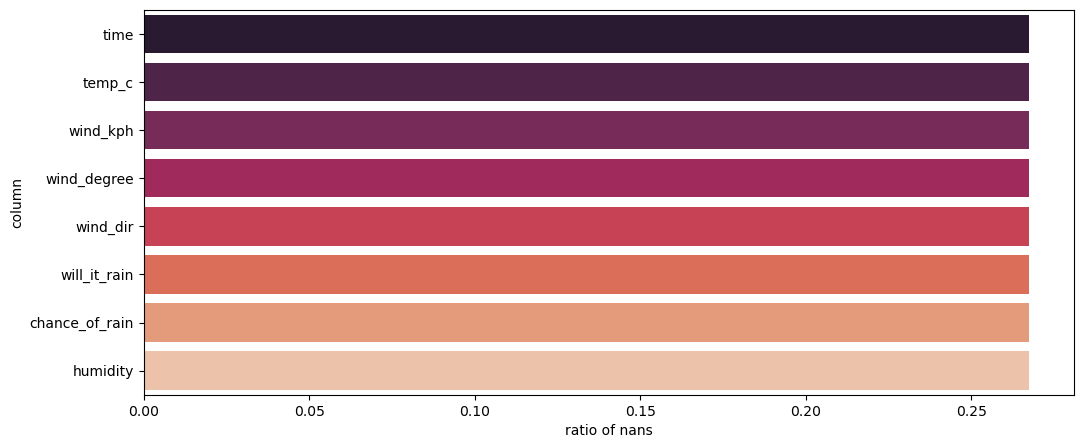

In [81]:
#g = dfc[dfc.columns[dfc.isna().any(0)]].isna().sum().sort_values(ascending=False) / dfc.shape[0]
g = udf[udf.columns[udf.isna().any()]].isna().sum().sort_values(ascending=False) / udf.shape[0]
g = g.reset_index().rename(columns={'index': 'column', 0: 'nans'})
sns.barplot(x='nans', y='column', data=g, ax=plt.subplots(1,1,figsize=(12,5))[1], palette='rocket')
plt.xlabel('ratio of nans');

In [82]:
udf['time'] = udf['time'].fillna(udf['when'])

datom = pd.to_datetime(udf['when']).dt.strftime("%Y-%m-%d")
udf['datum'] = pd.to_datetime(datom)


print(sorted(udf['datum'].unique()))
datum_mapping = {label: idx for idx, label in enumerate(np.unique(udf['datum']))}
udf['datum'] = udf['datum'].map(datum_mapping)
datum_mapping

inv_datum_mapping = {v: k for k, v in datum_mapping.items()}
udf['datumlabel'] = udf['datum'].map(inv_datum_mapping)



udf['temp_c'] = pd.to_numeric(udf['temp_c'].fillna('0'))
#print(udf['temp_c'].unique())
mean_temp_c = udf['temp_c'].mean()
udf['temp_c'].replace(0., mean_temp_c, inplace=True)  

udf['wind_kph'] = pd.to_numeric(udf['wind_kph'].fillna('0'))
#print(udf['wind_kph'].unique())
mean_wind_kph = udf['wind_kph'].mean()
udf['wind_kph'].replace(0., mean_wind_kph, inplace=True)   

udf['wind_degree'] = pd.to_numeric(udf['wind_degree'].fillna('0'))
#print(udf['wind_degree'].unique())
mean_wind_degree = udf['wind_degree'].mean()
udf['wind_degree'].replace(0., mean_wind_degree, inplace=True)   

udf['wind_dir'] = udf['wind_dir'].fillna('W')

udf['will_it_rain'] = pd.to_numeric(udf['will_it_rain'].fillna('0'))
#print(udf['will_it_rain'].unique())
mean_will_it_rain = udf['will_it_rain'].mean()
udf['will_it_rain'].replace(0., mean_will_it_rain, inplace=True)  

udf['chance_of_rain'] = pd.to_numeric(udf['chance_of_rain'].fillna('0'))
#print(udf['chance_of_rain'].unique())
mean_chance_of_rain = udf['chance_of_rain'].mean()
udf['chance_of_rain'].replace(0., mean_chance_of_rain, inplace=True)    

udf['humidity'] = pd.to_numeric(udf['humidity'].fillna('0'))
#print(udf['humidity'].unique())
mean_humidity = udf['humidity'].mean()
udf['humidity'].replace(0., mean_humidity, inplace=True)    





[Timestamp('2023-04-22 00:00:00'), Timestamp('2023-04-23 00:00:00'), Timestamp('2023-05-06 00:00:00'), Timestamp('2023-05-07 00:00:00'), Timestamp('2023-05-20 00:00:00'), Timestamp('2023-05-21 00:00:00'), Timestamp('2023-06-24 00:00:00'), Timestamp('2023-06-25 00:00:00'), Timestamp('2023-07-01 00:00:00'), Timestamp('2023-07-02 00:00:00'), Timestamp('2023-07-15 00:00:00'), Timestamp('2023-07-16 00:00:00'), Timestamp('2023-07-29 00:00:00'), Timestamp('2023-07-30 00:00:00'), Timestamp('2023-09-03 00:00:00'), Timestamp('2023-09-04 00:00:00'), Timestamp('2023-09-16 00:00:00'), Timestamp('2023-09-17 00:00:00'), Timestamp('2023-10-14 00:00:00'), Timestamp('2023-10-15 00:00:00')]


In [83]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4448 entries, 0 to 4447
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   run             4448 non-null   object        
 1   place           4448 non-null   object        
 2   division        4448 non-null   int64         
 3   when            4448 non-null   object        
 4   who             4448 non-null   int64         
 5   withwho         4448 non-null   object        
 6   total           4448 non-null   float64       
 7   WLT             4448 non-null   int64         
 8   hurdless        4448 non-null   float64       
 9   colour          4448 non-null   int64         
 10  running         4448 non-null   int64         
 11  dog             4448 non-null   float64       
 12  name            4448 non-null   int64         
 13  start           4448 non-null   float64       
 14  colourlabel     4448 non-null   object        
 15  WLTl

In [84]:
#colour_mapping = {'P': 0,'K': 1}
#WLT_mapping = {'W': 0,'L': 1,'T': 2}
#who mapping {'WildRunners Maximini': 0, 'WildRunners Nightfall': 1, 'WildRunners Wonders': 2, 'WildRunners XXL': 3, 
#             'WildRunners Zephyr': 4,'WildRunners dreamers': 5, 'WildRunners hopefuls': 6}
#name mapping: {'Abby': 0, 'Agnes': 1, 'Alex': 2, 'Alfie': 3, 'Angie': 4, 'Apollo': 5, 'Ashley': 6, 'Bailey': 7,
#               'Bella': 8, 'Bonnie': 9, 'Bree': 10, 'Brix': 11, 'Brooke': 12, 'Bruno': 13, 'Cookies': 14, 'Dexter': 15,
#               'Dixie': 16, 'Dusty': 17, 'Easy': 18, 'Enola': 19, 'Falco': 20, 'Fleur': 21, 'Gerry': 22, 'Gordon': 23,
#               'Hank': 24, 'Hector': 25, 'Henry': 26, 'Jasper': 27, 'Jessie': 28, 'Kent': 29, 'Kesha': 30, 'Maggie': 31,
#               'Mason': 32, 'Milo': 33, 'Moon': 34, 'Negro': 35, 'Nina': 36, 'Pax': 37, 'Punk': 38, 'Rex': 39, 'Riley': 40,
#               'Rocky': 41, 'Sara': 42, 'Scotty': 43, 'Sirius': 44, 'Speedy': 45, 'Sunny': 46, 'Ted': 47, 'Them': 48,
#               'Tyna': 49}

#print(sorted(udf['wind_dir'].unique()))


wind_dir_mapping = {label: idx for idx, label in enumerate(np.unique(udf['wind_dir']))}
udf['wind_dir'] = udf['wind_dir'].map(wind_dir_mapping)
wind_dir_mapping
inv_wind_dir_mapping = {v: k for k, v in wind_dir_mapping.items()}
udf['wind_dirlabel'] = udf['wind_dir'].map(inv_wind_dir_mapping)

print(sorted(udf['place'].unique()))
place_mapping = {label: idx for idx, label in enumerate(np.unique(udf['place']))}
udf['place'] = udf['place'].map(place_mapping)
print(place_mapping)
inv_place_mapping = {v: k for k, v in place_mapping.items()}
udf['placelabel'] = udf['place'].map(inv_place_mapping)


udf['dtime'] = pd.to_datetime(udf['time'], format='mixed')
#dwhen = pd.to_datetime(udf['time']).dt.strftime("%Y-%m-%d %H:%M:%S")
#dtime = datetime.strftime(udf['time'],"%Y-%m-%d %H:%M:%S") 
#udf['dwhen'] = pd.to_datetime(udf['time'])
#udf = udf.set_index('dwhen')
#udf['dwhen'] = pd.to_datetime(udf['time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

udf = udf.groupby(['division','name','running','WLT', pd.Grouper(key='dtime', freq='9s')]).first().reset_index()


udf.to_csv('03.WildRunner_versenyadatok.temp3.csv', sep=';', index=False)  


['Blsany', 'Heroltice', 'Litomysl', 'Lounovice', 'Nove Mesto pod Smrkem', 'Prostejov', 'Tápiószentmárton', 'Vodnany', 'Zamberk']
{'Blsany': 0, 'Heroltice': 1, 'Litomysl': 2, 'Lounovice': 3, 'Nove Mesto pod Smrkem': 4, 'Prostejov': 5, 'Tápiószentmárton': 6, 'Vodnany': 7, 'Zamberk': 8}


In [85]:
udf = pd.DataFrame()
udf = pd.read_csv('03.WildRunner_versenyadatok.temp3.csv',sep=';', encoding='utf-8')
udf.head(5)

,division,name,running,WLT,dtime,run,place,when,who,withwho,...,wind_kph,wind_degree,wind_dir,will_it_rain,chance_of_rain,humidity,datum,datumlabel,wind_dirlabel,placelabel
0,1,2,1,0,2023-09-04 11:00:00,Mistrovstvi Ceske republiky,0,2023-09-04 11:25:25,5,WildRunners hopefuls,...,7.900000,112.00000,1,0.128597,14.802158,49.000000,15,2023-09-04,ESE,Blsany
1,1,2,2,0,2023-04-23 09:17:06,Hanacke skvarek,1,2023-04-23 09:17:06,5,FOFR DOG,...,9.707711,145.49348,12,0.128597,14.802158,41.892761,1,2023-04-23,W,Heroltice
2,1,2,2,0,2023-04-23 11:03:54,Hanacke skvarek,1,2023-04-23 11:03:58,5,WildRunners hopefuls,...,9.707711,145.49348,12,0.128597,14.802158,41.892761,1,2023-04-23,W,Heroltice
3,1,2,2,0,2023-04-23 12:15:00,Hanacke skvarek,1,2023-04-23 12:15:03,5,WildRunners hopefuls,...,9.707711,145.49348,12,0.128597,14.802158,41.892761,1,2023-04-23,W,Heroltice
4,1,2,2,0,2023-04-23 12:17:33,Hanacke skvarek,1,2023-04-23 12:17:35,5,WildRunners hopefuls,...,9.707711,145.49348,12,0.128597,14.802158,41.892761,1,2023-04-23,W,Heroltice


In [86]:

#itt a csapateredmények lesznek nyilvántartva
# Group by 'wholabel', 'division', and 'WLTlabel', then count the occurrences of 'W' and 'L'
counts_df = udf.groupby(['datumlabel','wholabel', 'division', 'WLTlabel'])['WLTlabel'].value_counts().unstack(fill_value=0)
# Rename the columns to 'W_count' and 'L_count'
counts_df.columns = ['L_count', 'T_count','W_count']

#itt a kutyák egyéni eredményei lesznek nyilvántartva
#Kcounts_df = counts_df.copy()
#Kcounts_df.columns = ['KL_count', 'KT_count','KW_count']

#mivel 4 versenybő áll egy futam, ezért a gyözelmek számát osztani kell 4-el
counts_df[['L_count', 'T_count', 'W_count']] /= 4

#counts_df.reset_index(inplace=True)

udf = pd.merge(udf, counts_df, on=['datumlabel','wholabel', 'division'], how='inner')

#udf = pd.merge(udf, Kcounts_df, on=['datumlabel','namelabel', 'division','running'], how='inner')

max_df = udf.groupby(['datumlabel', 'division'], as_index=False)['W_count'].max()
max_df = max_df.rename(columns={'W_count':'W_max'})

#max_df.reset_index(inplace=True)
mix_df = max_df.merge( counts_df,  on=['datumlabel', 'division'], how='inner')
udf = pd.merge(udf, mix_df, on=['datumlabel','L_count','T_count','W_count', 'division'], how='inner')

udf.loc[udf['W_count'] != udf['W_max'], 'W_max'] = 0


udf['W_count'] = udf['W_count'].round()
udf['L_count'] = udf['L_count'].round()
udf['T_count'] = udf['T_count'].round()
udf['W_max'] = udf['W_max'].round()


conditions = [
    (udf['dog'] <= 3.8),
    ((3.8 <= udf['dog']) & (udf['dog'] <= 4.49)),
    ((4.49 <= udf['dog']) & (udf['dog'] <= 5.18)),
    (5.18 <= udf['dog'])
]
values = [0, 1, 2, 3]

# Apply the conditions using numpy's where function
udf['dogcl'] = np.select(conditions, values, default=np.nan) 


conditionskph = [
    (udf['wind_kph'] < 8.21),
    ((8.21 <= udf['wind_kph']) & (udf['wind_kph'] <= 12.93)),
    ((12.93 <= udf['wind_kph']) & (udf['wind_kph'] <= 17.65)),
    (17.65 < udf['wind_kph'])
]
values = [0, 1, 2, 3]

# Apply the conditions using numpy's where function
udf['wind_kphcl'] = np.select(conditionskph, values, default=np.nan) 


conditionstemp = [
    (udf['temp_c'] < 13.6),
    ((13.6 <= udf['temp_c']) & (udf['temp_c'] <= 18.9)),
    ((18.9 < udf['temp_c']) & (udf['temp_c'] <= 24.2)),
    (24.2 < udf['temp_c'])
]
values = [0, 1, 2, 3]

# Apply the conditions using numpy's where function
udf['temp_ccl'] = np.select(conditionstemp, values, default=np.nan) 


conditionshum = [
    (udf['humidity'] < 44.07),
    ((44.07 <= udf['humidity']) & (udf['humidity'] <= 59.8)),
    ((59.8 < udf['humidity']) & (udf['humidity'] <= 75.53)),
    (75.53 < udf['humidity'])
]
values = [0, 1, 2, 3]

# Apply the conditions using numpy's where function
udf['humcl'] = np.select(conditionshum, values, default=np.nan) 


udf.head(5000)

,division,name,running,WLT,dtime,run,place,when,who,withwho,...,wind_dirlabel,placelabel,L_count,T_count,W_count,W_max,dogcl,wind_kphcl,temp_ccl,humcl
0,1,2,1,0,2023-09-04 11:00:00,Mistrovstvi Ceske republiky,0,2023-09-04 11:25:25,5,WildRunners hopefuls,...,ESE,Blsany,3.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
1,1,2,2,0,2023-09-04 08:00:00,Mistrovstvi Ceske republiky,0,2023-09-04 08:35:38,5,Lavina Alfa,...,NNE,Blsany,3.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
2,1,2,2,0,2023-09-04 11:00:00,Mistrovstvi Ceske republiky,0,2023-09-04 11:23:56,5,WildRunners hopefuls,...,ESE,Blsany,3.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
3,1,16,3,0,2023-09-04 11:00:00,Mistrovstvi Ceske republiky,0,2023-09-04 11:25:25,5,WildRunners hopefuls,...,ESE,Blsany,3.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
4,1,16,4,0,2023-09-04 08:00:00,Mistrovstvi Ceske republiky,0,2023-09-04 08:35:38,5,Lavina Alfa,...,NNE,Blsany,3.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,13,48,2,0,2023-06-25 12:00:00,EFC_1 ring_1,6,2023-07-29 15:59:02,4,Real Ballance Flyball Team,...,NNE,Tápiószentmárton,5.0,0.0,5.0,5.0,3.0,1.0,2.0,1.0
3073,13,48,2,0,2023-07-29 12:00:00,EFC_1 ring_1,6,2023-07-29 12:27:58,4,Real Ballance Flyball Team,...,W,Tápiószentmárton,5.0,0.0,5.0,5.0,3.0,1.0,3.0,0.0
3074,13,48,2,2,2023-06-24 15:00:00,EFC_1 ring_1,6,2023-07-29 12:30:34,4,Real Ballance Flyball Team,...,NE,Tápiószentmárton,5.0,0.0,5.0,5.0,3.0,2.0,1.0,2.0
3075,13,48,2,2,2023-06-25 12:00:00,EFC_1 ring_1,6,2023-07-29 15:54:56,4,Real Ballance Flyball Team,...,NNE,Tápiószentmárton,5.0,0.0,5.0,5.0,2.0,1.0,2.0,1.0


In [87]:
udf.to_csv('03.WildRunner_versenyadatok.temp4.csv', sep=';', index=False)  

In [88]:
udf = pd.DataFrame()
udf = pd.read_csv('03.WildRunner_versenyadatok.temp4.csv',sep=';', encoding='utf-8')
udf.head(3)

,division,name,running,WLT,dtime,run,place,when,who,withwho,...,wind_dirlabel,placelabel,L_count,T_count,W_count,W_max,dogcl,wind_kphcl,temp_ccl,humcl
0,1,2,1,0,2023-09-04 11:00:00,Mistrovstvi Ceske republiky,0,2023-09-04 11:25:25,5,WildRunners hopefuls,...,ESE,Blsany,3.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
1,1,2,2,0,2023-09-04 08:00:00,Mistrovstvi Ceske republiky,0,2023-09-04 08:35:38,5,Lavina Alfa,...,NNE,Blsany,3.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
2,1,2,2,0,2023-09-04 11:00:00,Mistrovstvi Ceske republiky,0,2023-09-04 11:23:56,5,WildRunners hopefuls,...,ESE,Blsany,3.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0


In [89]:
#print("Column names:", udf.columns.tolist())
column_dict = {idx: col_name for idx, col_name in enumerate(udf.columns)}
print("Column names dictionary:")
print(column_dict)

code_label_dict = dict(zip(udf['wind_dir'], udf['wind_dirlabel']))
print(code_label_dict)
code_label_dict = dict(zip(udf['WLT'], udf['WLTlabel']))
print(code_label_dict)
#code_label_dict = dict(zip(udf['ivar'], udf['ivarlabel']))
#print(code_label_dict)
code_label_dict = dict(zip(udf['place'], udf['placelabel']))
print(code_label_dict)
#code_label_dict = dict(zip(udf['chip_szam'], udf['chip_szamlabel']))
#print(code_label_dict)
code_label_dict = dict(zip(udf['name'], udf['namelabel']))
print(code_label_dict)
code_label_dict = dict(zip(udf['datum'], udf['datumlabel']))
print(code_label_dict)
code_label_dict = dict(zip(udf['who'], udf['wholabel']))
print(code_label_dict)
code_label_dict = dict(zip(udf['colour'], udf['colourlabel']))
print(code_label_dict)

Column names dictionary:
{0: 'division', 1: 'name', 2: 'running', 3: 'WLT', 4: 'dtime', 5: 'run', 6: 'place', 7: 'when', 8: 'who', 9: 'withwho', 10: 'total', 11: 'hurdless', 12: 'colour', 13: 'dog', 14: 'start', 15: 'colourlabel', 16: 'WLTlabel', 17: 'namelabel', 18: 'wholabel', 19: 'time', 20: 'temp_c', 21: 'wind_kph', 22: 'wind_degree', 23: 'wind_dir', 24: 'will_it_rain', 25: 'chance_of_rain', 26: 'humidity', 27: 'datum', 28: 'datumlabel', 29: 'wind_dirlabel', 30: 'placelabel', 31: 'L_count', 32: 'T_count', 33: 'W_count', 34: 'W_max', 35: 'dogcl', 36: 'wind_kphcl', 37: 'temp_ccl', 38: 'humcl'}
{1: 'ESE', 4: 'NNE', 12: 'W', 0: 'E', 3: 'NE', 5: 'NNW', 2: 'N', 9: 'SSE', 14: 'WSW', 13: 'WNW', 8: 'SE', 6: 'NW', 10: 'SSW', 7: 'S', 11: 'SW'}
{0: 'L', 2: 'W', 1: 'T'}
{0: 'Blsany', 1: 'Heroltice', 8: 'Zamberk', 5: 'Prostejov', 2: 'Litomysl', 4: 'Nove Mesto pod Smrkem', 3: 'Lounovice', 7: 'Vodnany', 6: 'Tápiószentmárton'}
{2: 'Alex', 16: 'Dixie', 44: 'Sirius', 46: 'Sunny', 49: 'Tyna', 3: 'Alfi

In [90]:
dfk = pd.DataFrame()
dfk = pd.read_csv('02.Kutyak.alapadatai.csv',sep=';', encoding='utf-8')
dfk.head(3)

,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,chip_szam,ulna_hossz,ugrasi_magassag
0,TM800418,Dexter,Kooikerhondje,kan,ivartalan,2010-02-14,93900005238999,14.05,25.0
1,NP950613,Jasper,Border Collie,kan,ivartalan,2011-03-28,93900007189034,16.56,30.0
2,UF830429,Angie,Border,szuka,ivartalan,2014-02-06,93900003827629,15.22,27.5


In [91]:
# Konvertáljuk az 'szuletesi_datum' oszlopot dátumformátumba
#df = joined_df
dfk['szuletesi_datum'] = pd.to_datetime(dfk['szuletesi_datum'])

#converting LABELS to NUMERIC

ivar_mapping = {label: idx for idx, label in enumerate(np.unique(dfk['ivar']))}
dfk['ivar'] = dfk['ivar'].map(ivar_mapping)
ivar_mapping
print(sorted(dfk['ivar'].unique()))
print(sorted(dfk['chip_szam'].unique()))
chip_szam_mapping = {label: idx for idx, label in enumerate(np.unique(dfk['chip_szam']))}
dfk['chip_szam'] = dfk['chip_szam'].map(chip_szam_mapping)
chip_szam_mapping


#invers mapping: NUMERIC to LABELS


inv_ivar_mapping = {v: k for k, v in ivar_mapping.items()}
dfk['ivarlabel'] = dfk['ivar'].map(inv_ivar_mapping)
inv_chip_szam_mapping = {v: k for k, v in chip_szam_mapping.items()}
dfk['chip_szamlabel'] = dfk['chip_szam'].map(inv_chip_szam_mapping)

[0, 1]
[93900001206699, 93900001547455, 93900001569304, 93900001757525, 93900001974600, 93900002110777, 93900002501294, 93900002523549, 93900002731726, 93900002928155, 93900002949462, 93900002956276, 93900003495780, 93900003589833, 93900003598960, 93900003669802, 93900003818036, 93900003826751, 93900003827629, 93900003871143, 93900004198045, 93900004293075, 93900004371167, 93900005172450, 93900005238999, 93900005539134, 93900005627226, 93900005669853, 93900005854271, 93900006680519, 93900006876951, 93900007138387, 93900007189034, 93900007209752, 93900007218892, 93900007664925, 93900007728423, 93900008222471, 93900008401355, 93900008474491, 93900008694414, 93900008748969, 93900008830504, 93900008979908, 93900009309522, 93900009320601, 93900009646655, 93900009650506, 93900009738344, 93900009815888, 93900009884426]


In [92]:
joined_df = pd.merge(dfk, udf, left_on='nev', right_on='namelabel', how='inner')
print(joined_df.shape)
print(joined_df.columns)

joined_df.head(3)


(3077, 50)
Index(['felvezeto', 'nev', 'fajta', 'nem', 'ivar', 'szuletesi_datum',
       'chip_szam', 'ulna_hossz', 'ugrasi_magassag', 'ivarlabel',
       'chip_szamlabel', 'division', 'name', 'running', 'WLT', 'dtime', 'run',
       'place', 'when', 'who', 'withwho', 'total', 'hurdless', 'colour', 'dog',
       'start', 'colourlabel', 'WLTlabel', 'namelabel', 'wholabel', 'time',
       'temp_c', 'wind_kph', 'wind_degree', 'wind_dir', 'will_it_rain',
       'chance_of_rain', 'humidity', 'datum', 'datumlabel', 'wind_dirlabel',
       'placelabel', 'L_count', 'T_count', 'W_count', 'W_max', 'dogcl',
       'wind_kphcl', 'temp_ccl', 'humcl'],
      dtype='object')


,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,chip_szam,ulna_hossz,ugrasi_magassag,ivarlabel,...,wind_dirlabel,placelabel,L_count,T_count,W_count,W_max,dogcl,wind_kphcl,temp_ccl,humcl
0,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,24,14.05,25.0,ivartalan,...,W,Heroltice,8.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0
1,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,24,14.05,25.0,ivartalan,...,W,Heroltice,8.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0
2,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,24,14.05,25.0,ivartalan,...,W,Heroltice,8.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0


In [93]:
selected_column = joined_df['when']
joined_df.drop('when', axis=1, inplace=True)
joined_df.insert(0, 'when', selected_column)

selected_column = joined_df['place']
joined_df.drop('place', axis=1, inplace=True)
joined_df.insert(1, 'place', selected_column)

selected_column = joined_df['division']
joined_df.drop('division', axis=1, inplace=True)
joined_df.insert(2, 'division', selected_column)

selected_column = joined_df['who']
joined_df.drop('who', axis=1, inplace=True)
joined_df.insert(3, 'who', selected_column)


#print(sorted(joined_df['when'].unique()))
when_mapping = {label: idx for idx, label in enumerate(np.unique(joined_df['when']))}
joined_df['when'] = joined_df['when'].map(when_mapping)
print(when_mapping)
inv_when_mapping = {v: k for k, v in when_mapping.items()}
joined_df['whenlabel'] = joined_df['when'].map(inv_when_mapping)

#joined_df['whenlabel'] = pd.to_datetime(joined_df['whenlabel'])



{'2023-04-22 10:11:57': 0, '2023-04-22 10:13:25': 1, '2023-04-22 10:15:06': 2, '2023-04-22 10:37:19': 3, '2023-04-22 10:38:44': 4, '2023-04-22 10:40:15': 5, '2023-04-22 10:49:45': 6, '2023-04-22 10:51:02': 7, '2023-04-22 10:53:04': 8, '2023-04-22 10:54:28': 9, '2023-04-22 11:03:07': 10, '2023-04-22 11:04:21': 11, '2023-04-22 11:08:11': 12, '2023-04-22 11:09:37': 13, '2023-04-22 11:20:52': 14, '2023-04-22 11:23:20': 15, '2023-04-22 11:24:51': 16, '2023-04-22 11:31:56': 17, '2023-04-22 11:33:06': 18, '2023-04-22 11:34:27': 19, '2023-04-22 11:45:05': 20, '2023-04-22 11:46:37': 21, '2023-04-22 11:48:20': 22, '2023-04-22 11:51:12': 23, '2023-04-22 12:00:29': 24, '2023-04-22 12:01:52': 25, '2023-04-22 12:03:23': 26, '2023-04-22 12:04:58': 27, '2023-04-22 15:06:40': 28, '2023-04-22 15:08:03': 29, '2023-04-22 15:09:16': 30, '2023-04-22 15:15:43': 31, '2023-04-22 15:17:09': 32, '2023-04-22 15:18:20': 33, '2023-04-22 15:38:08': 34, '2023-04-22 15:40:15': 35, '2023-04-22 15:42:43': 36, '2023-04-2

In [94]:
print("Column names:", joined_df.columns.tolist())
joined_df.head()
joined_df.to_csv('03.WildRunner.joined_versenyadatok.csv', sep=';', index=False)  

Column names: ['when', 'place', 'division', 'who', 'felvezeto', 'nev', 'fajta', 'nem', 'ivar', 'szuletesi_datum', 'chip_szam', 'ulna_hossz', 'ugrasi_magassag', 'ivarlabel', 'chip_szamlabel', 'name', 'running', 'WLT', 'dtime', 'run', 'withwho', 'total', 'hurdless', 'colour', 'dog', 'start', 'colourlabel', 'WLTlabel', 'namelabel', 'wholabel', 'time', 'temp_c', 'wind_kph', 'wind_degree', 'wind_dir', 'will_it_rain', 'chance_of_rain', 'humidity', 'datum', 'datumlabel', 'wind_dirlabel', 'placelabel', 'L_count', 'T_count', 'W_count', 'W_max', 'dogcl', 'wind_kphcl', 'temp_ccl', 'humcl', 'whenlabel']


In [95]:
#print("Column names:", joined_df.columns.tolist())
column_dict = {idx: col_name for idx, col_name in enumerate(joined_df.columns)}
print("Column names dictionary:")
print(column_dict)

code_label_dict = dict(zip(joined_df['wind_dir'], joined_df['wind_dirlabel']))
print(code_label_dict)
code_label_dict = dict(zip(joined_df['WLT'], joined_df['WLTlabel']))
print(code_label_dict)
code_label_dict = dict(zip(joined_df['ivar'], joined_df['ivarlabel']))
print(code_label_dict)
code_label_dict = dict(zip(joined_df['place'], joined_df['placelabel']))
print(code_label_dict)
#code_label_dict = dict(zip(joined_df['chip_szam'], joined_df['chip_szamlabel']))
#print(code_label_dict)
code_label_dict = dict(zip(joined_df['name'], joined_df['namelabel']))
print(code_label_dict)
code_label_dict = dict(zip(joined_df['who'], joined_df['wholabel']))
print(code_label_dict)
code_label_dict = dict(zip(joined_df['colour'], joined_df['colourlabel']))
print(code_label_dict)
code_label_dict = dict(zip(joined_df['datum'], joined_df['datumlabel']))
print(code_label_dict)
code_label_dict = dict(zip(joined_df['when'], joined_df['whenlabel']))
print(code_label_dict)

Column names dictionary:
{0: 'when', 1: 'place', 2: 'division', 3: 'who', 4: 'felvezeto', 5: 'nev', 6: 'fajta', 7: 'nem', 8: 'ivar', 9: 'szuletesi_datum', 10: 'chip_szam', 11: 'ulna_hossz', 12: 'ugrasi_magassag', 13: 'ivarlabel', 14: 'chip_szamlabel', 15: 'name', 16: 'running', 17: 'WLT', 18: 'dtime', 19: 'run', 20: 'withwho', 21: 'total', 22: 'hurdless', 23: 'colour', 24: 'dog', 25: 'start', 26: 'colourlabel', 27: 'WLTlabel', 28: 'namelabel', 29: 'wholabel', 30: 'time', 31: 'temp_c', 32: 'wind_kph', 33: 'wind_degree', 34: 'wind_dir', 35: 'will_it_rain', 36: 'chance_of_rain', 37: 'humidity', 38: 'datum', 39: 'datumlabel', 40: 'wind_dirlabel', 41: 'placelabel', 42: 'L_count', 43: 'T_count', 44: 'W_count', 45: 'W_max', 46: 'dogcl', 47: 'wind_kphcl', 48: 'temp_ccl', 49: 'humcl', 50: 'whenlabel'}
{12: 'W', 14: 'WSW', 13: 'WNW', 6: 'NW', 5: 'NNW', 2: 'N', 4: 'NNE', 1: 'ESE', 3: 'NE', 0: 'E', 9: 'SSE', 8: 'SE', 11: 'SW', 7: 'S', 10: 'SSW'}
{0: 'L', 2: 'W', 1: 'T'}
{1: 'ivartalan', 0: 'ivaros